# Imports

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
shape_file="NGPR7ADT/shapefile/gadm36_NGA_1.shp"
data_file = "NGPR7ADT/NGPR7AFL.DTA"
map_file = "NGPR7ADT/NGPR7AFL.MAP"

In [ ]:
gdf_shape = gpd.read_file(shape_file)

In [ ]:
df_data = pd.read_stata(data_file)

# Exploring Data

In [ ]:
gdf_shape.head()

,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,geometry
0,NGA,Nigeria,NGA.1_1,Abia,NaN,NaN,State,State,NaN,NG.AB,"POLYGON ((7.48998 4.85506, 7.49438 4.84743, 7...."
1,NGA,Nigeria,NGA.2_1,Adamawa,NaN,NaN,State,State,NaN,NG.AD,"POLYGON ((12.01237 7.50763, 12.00726 7.50804, ..."
2,NGA,Nigeria,NGA.3_1,Akwa Ibom,NaN,NaN,State,State,NaN,NG.AK,"MULTIPOLYGON (((7.55570 4.50408, 7.55597 4.504..."
3,NGA,Nigeria,NGA.4_1,Anambra,NaN,NaN,State,State,NaN,NG.AN,"POLYGON ((7.25012 5.92631, 7.24832 5.92668, 7...."
4,NGA,Nigeria,NGA.5_1,Bauchi,NaN,NaN,State,State,NaN,NG.BA,"POLYGON ((11.01984 9.70526, 11.02580 9.69224, ..."


In [ ]:
gdf_shape.shape

(37, 11)

In [ ]:
gdf_shape.NAME_1

0                          Abia
1                       Adamawa
2                     Akwa Ibom
3                       Anambra
4                        Bauchi
5                       Bayelsa
6                         Benue
7                         Borno
8                   Cross River
9                         Delta
10                       Ebonyi
11                          Edo
12                        Ekiti
13                        Enugu
14    Federal Capital Territory
15                        Gombe
16                          Imo
17                       Jigawa
18                       Kaduna
19                         Kano
20                      Katsina
21                        Kebbi
22                         Kogi
23                        Kwara
24                        Lagos
25                    Nassarawa
26                        Niger
27                         Ogun
28                         Ondo
29                         Osun
30                          Oyo
31      

In [ ]:
df_data.head()

,hhid,hvidx,hv000,hv001,hv002,hv003,hv004,hv005,hv006,hv007,...,idxdis,hdis1,hdis2,hdis3,hdis4,hdis5,hdis6,hdis7,hdis8,hdis9
0,1 1,1,NG7,1,1,1,1,1368354,9,2018,...,1,yes,some difficulty,no,no difficulty hearing,no difficulty communicating,some difficulty,some difficulty,some difficulty,some difficulty
1,1 1,2,NG7,1,1,1,1,1368354,9,2018,...,2,no,no difficulty seeing,no,no difficulty hearing,no difficulty communicating,no difficulty remembering/concentrating,no difficulty walking or climbing,no difficulty washing or dressing,no difficulty
2,1 1,3,NG7,1,1,1,1,1368354,9,2018,...,3,no,no difficulty seeing,no,no difficulty hearing,no difficulty communicating,no difficulty remembering/concentrating,no difficulty walking or climbing,no difficulty washing or dressing,no difficulty
3,1 1,4,NG7,1,1,1,1,1368354,9,2018,...,4,no,no difficulty seeing,no,no difficulty hearing,no difficulty communicating,no difficulty remembering/concentrating,no difficulty walking or climbing,no difficulty washing or dressing,no difficulty
4,1 1,5,NG7,1,1,1,1,1368354,9,2018,...,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_data["shstate"]

0         Benue
1         Benue
2         Benue
3         Benue
4         Benue
          ...  
188005      Oyo
188006      Oyo
188007      Oyo
188008      Oyo
188009      Oyo
Name: shstate, Length: 188010, dtype: category
Categories (37, object): ['Sokoto' < 'Zamfara' < 'Katsina' < 'Jigawa' ... 'Bayelsa' < 'Delta' < 'Lagos' < 'Ogun']

In [ ]:
unique_states = list(df_data["shstate"].unique())

In [ ]:
print(unique_states)
len(unique_states)

['Benue', 'Federal Capital Territory', 'Kogi', 'Kwara', 'Nasarawa', 'Niger', 'Plateau', 'Adamawa', 'Bauchi', 'Borno', 'Gombe', 'Taraba', 'Yobe', 'Jigawa', 'Kaduna', 'Kano', 'Katsina', 'Kebbi', 'Sokoto', 'Zamfara', 'Abia', 'Anambra', 'Ebonyi', 'Enugu', 'Imo', 'Akwa Ibom', 'Bayelsa', 'Cross River', 'Delta', 'Edo', 'Rivers', 'Ekiti', 'Lagos', 'Ogun', 'Ondo', 'Osun', 'Oyo']


37

### From the data of both datasources, we found that state is the most common attribute to link the two

In [ ]:
df_data["shstate"] = df_data["shstate"].replace("fct abuja", "Federal Capital Territory")
df_data["shstate"] = df_data["shstate"].apply(lambda x: x.title())


In [ ]:
unique_states = list(df_data["shstate"].unique())
print(unique_states)
len(unique_states)

['Benue', 'Federal Capital Territory', 'Kogi', 'Kwara', 'Nasarawa', 'Niger', 'Plateau', 'Adamawa', 'Bauchi', 'Borno', 'Gombe', 'Taraba', 'Yobe', 'Jigawa', 'Kaduna', 'Kano', 'Katsina', 'Kebbi', 'Sokoto', 'Zamfara', 'Abia', 'Anambra', 'Ebonyi', 'Enugu', 'Imo', 'Akwa Ibom', 'Bayelsa', 'Cross River', 'Delta', 'Edo', 'Rivers', 'Ekiti', 'Lagos', 'Ogun', 'Ondo', 'Osun', 'Oyo']


37

In [ ]:
unique_states.sort() == list(gdf_shape.NAME_1).sort()

True

## Merge the DataFrames based on 'shstate' and 'NAME_1' columns

In [ ]:
merged_data = pd.merge(gdf_shape, df_data, left_on='NAME_1', right_on='shstate', how='inner')

In [ ]:
# # Convert the 'geometry' column to MultiPolygon if needed
# merged_data['geometry'] = gpd.GeoSeries(merged_data['geometry']).apply(lambda x: x if x.geom_type == 'MultiPolygon' else gpd.GeoSeries([x]))

# # Create a GeoDataFrame from the merged data
# gdf_merged = gpd.GeoDataFrame(merged_data)

# Merge the DataFrames based on 'shstate' and 'NAME_1' columns
# merged_data = pd.merge(gdf_shape, df_data, left_on='NAME_1', right_on='shstate', how='inner')

# # Create a GeoDataFrame from the merged data
# gdf_merged = gpd.GeoDataFrame(merged_data, geometry='geometry_x')

# Merge the DataFrames based on 'shstate' and 'NAME_1' columns
merged_data = pd.merge(gdf_shape, df_data, left_on='NAME_1', right_on='shstate', how='inner')

# Create a GeoDataFrame from the merged data
gdf_merged = gpd.GeoDataFrame(merged_data)


In [ ]:
merged_data.head()

,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,...,idxdis,hdis1,hdis2,hdis3,hdis4,hdis5,hdis6,hdis7,hdis8,hdis9
0,NGA,Nigeria,NGA.1_1,Abia,NaN,NaN,State,State,NaN,NG.AB,...,1,no,no difficulty seeing,no,no difficulty hearing,no difficulty communicating,no difficulty remembering/concentrating,no difficulty walking or climbing,no difficulty washing or dressing,no difficulty
1,NGA,Nigeria,NGA.1_1,Abia,NaN,NaN,State,State,NaN,NG.AB,...,2,no,no difficulty seeing,no,no difficulty hearing,no difficulty communicating,no difficulty remembering/concentrating,no difficulty walking or climbing,no difficulty washing or dressing,no difficulty
2,NGA,Nigeria,NGA.1_1,Abia,NaN,NaN,State,State,NaN,NG.AB,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NGA,Nigeria,NGA.1_1,Abia,NaN,NaN,State,State,NaN,NG.AB,...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NGA,Nigeria,NGA.1_1,Abia,NaN,NaN,State,State,NaN,NG.AB,...,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Q.1 How many children under the age of five were tested for malaria with a blood smear test?

- The column that contains Number of children under the age of 5 is: hv014 (int)
- The column that contains result of blood smear test: hml32 (0, 1)

In [ ]:
number_of_children_u5 = merged_data['hv014'].sum()
print(f"Number of children under 5: {number_of_children_u5:,}")

Number of children under 5: 264,846


In [ ]:
positive_count = merged_data[merged_data['hml32'] == "positive"].shape[0]
print(f"Number of positive with blood smear test: {positive_count:,}")

Number of positive with blood smear test: 1,903


In [ ]:
u5_tested_positive_blood_smear_test  = merged_data[merged_data['hml32'] == "positive"]['hv014'].sum()
print(f"Number of Children tested positive with blood smear test: {u5_tested_positive_blood_smear_test:,}")

Number of Children tested positive with blood smear test: 4,481


### Q.2 How many children under the age of five were tested for malaria with a rapid test?

- Column `hml35` are test result for malaria with rapid test
- Column `hv014` are number of children under 5

In [ ]:
u5_tested_positive_rapid_test  = merged_data[merged_data['hml35'] == "positive"]['hv014'].sum()
print(f"Number of Children tested positive with Rapid Test: {u5_tested_positive_rapid_test:,}")

Number of Children tested positive with Rapid Test: 9,675


### Q.3 How many children tested positive for malaria with a microscopy?

- Column `sbelig` are people Eligibility for biomarkers (interested in where value is: yes selected for microscopy test)
- Column `hml32` are test result for malaria with blood smear test
- Column `hml35` are test result for malaria with rapid test
  
There are many ways to address this:
1. Tested positive with `blood smear test` and `selected for microscopy`
2. Tested positive with `rapid test` and `selected for microscopy`
3. Tested positive with both `blood smear test` and `rapid test` and `selected for microscopy`

   Since both `blood smear test` and `rapid test` can be used on people Eligibility for biomarkers, we take the third (3) option, where someone has to be both positive in `blood smear test` and `rapid test` and `selected for microscopy`

In [ ]:
filtered_data = merged_data[(merged_data['sbelig'] == "yes, selected for microscopy") &
                            (merged_data['hml32'] == "positive") &
                            (merged_data['hml35'] == "positive")]

total_positive_both_tests = filtered_data.shape[0]
print(f"Total people tested positive with both tests and selected for microscopy: {total_positive_both_tests:,}")

Total people tested positive with both tests and selected for microscopy: 1,674


### Q.4 How many children tested positive for malaria with a rapid test?

Since both `blood smear test` and `rapid test` can be used on people Eligibility for biomarkers, we apply the same option as Q.3, where someone has to be both positive in `blood smear test` and `rapid test` and `selected for microscopy`

In [ ]:
tested_positive_with_rapid_test = merged_data[merged_data['hml35'] == "positive"].shape[0]
print(f"Total people tested positive Rapid Test: {tested_positive_with_rapid_test:,}")

Total people tested positive Rapid Test: 4,161


### Q5. Make a plot showing the number of U5 children that tested positive for malaria by microscopy and the number of U5 children that tested negative for malaria by microscopy in urban and rural areas

- Column `hml32` are test result for malaria with blood smear test
- Column `hml35` are test result for malaria with rapid test
- Column `hv014` are number of children under 5
- Column `hv025` is the resident location, posible values: `urban`, `rura`
- Column `sbelig` shows `"yes, selected for microscopy"` if  Eligibility for biomarkers and `selected for microscopy`

In [ ]:
merged_data["hv014"].fillna(0)
# Filter the data for relevant columns and conditions
filtered_data = merged_data[(merged_data['hv014'] != 0) &
                            (merged_data['sbelig'].str.contains("yes, selected for microscopy"))]

In [ ]:
print(filtered_data.shape[0])
print(merged_data.shape[0])

36982
183119


In [ ]:
# Group data by resident location and microscopy test result
grouped_data = filtered_data.groupby(['hv025', 'hml32'])['hv014'].sum().unstack()

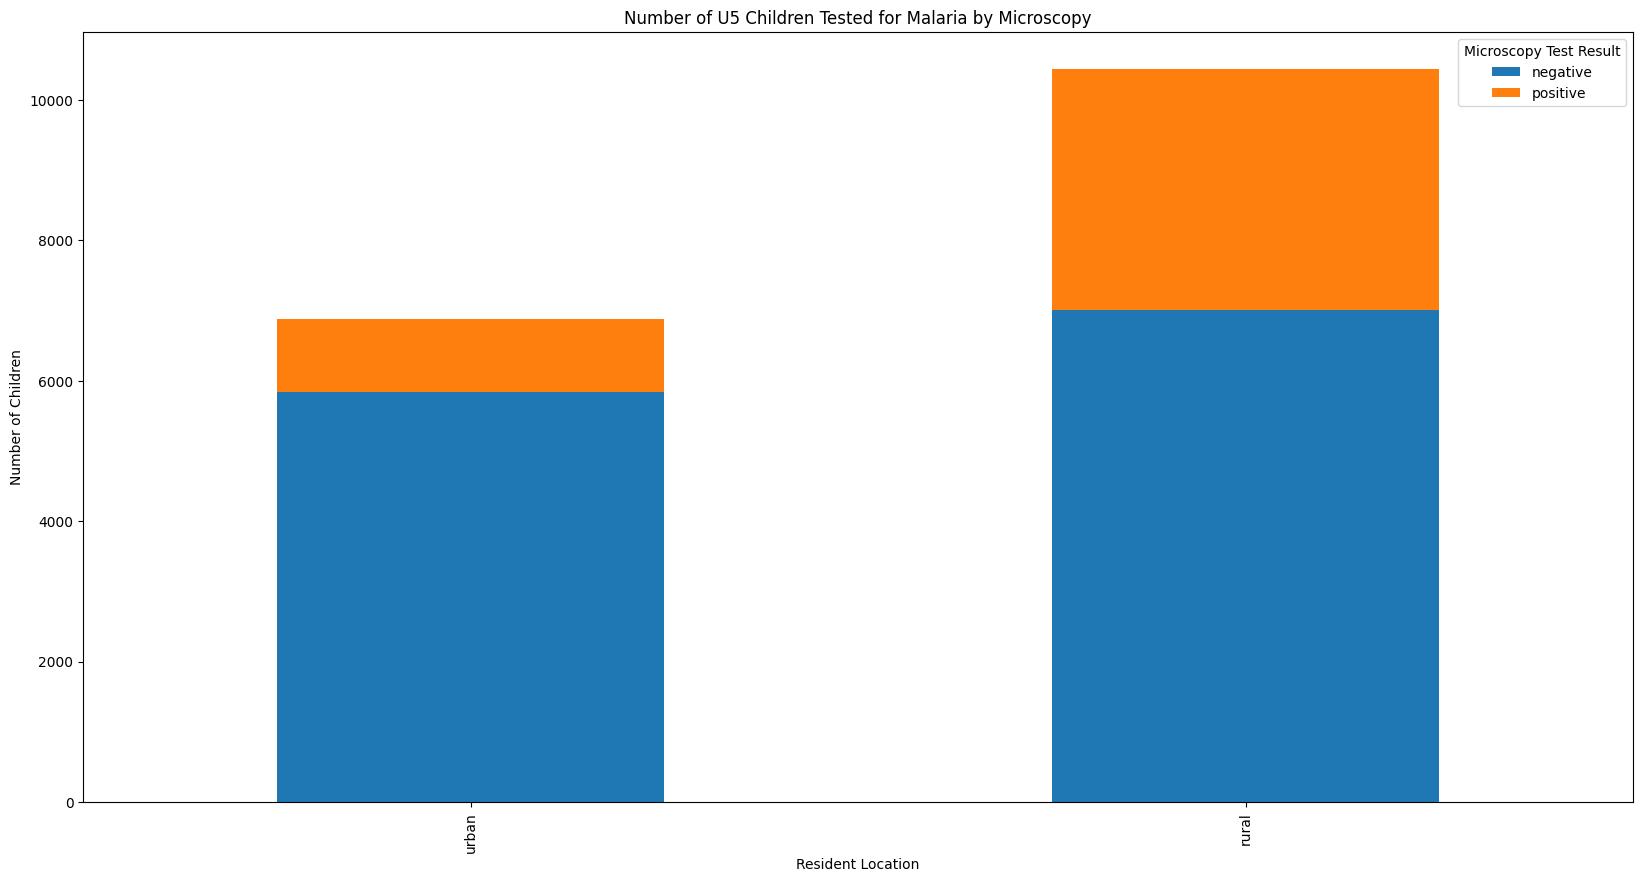

In [ ]:
# Plotting
grouped_data.plot(kind='bar', stacked=True, figsize=(20, 10))
plt.title('Number of U5 Children Tested for Malaria by Microscopy')
plt.xlabel('Resident Location')
plt.ylabel('Number of Children')
plt.legend(title='Microscopy Test Result')

plt.show()

### Q.6 plot showing the proportion of U5 children that tested positive for malaria by microscopy and the proportion of U5 children that tested negative for malaria by microscopy in urban and rural areas

In [ ]:
# Calculate proportions using already filtered data and grouped data
total_children_by_location = grouped_data.sum(axis=1)
proportion_data = grouped_data.divide(total_children_by_location, axis=0)


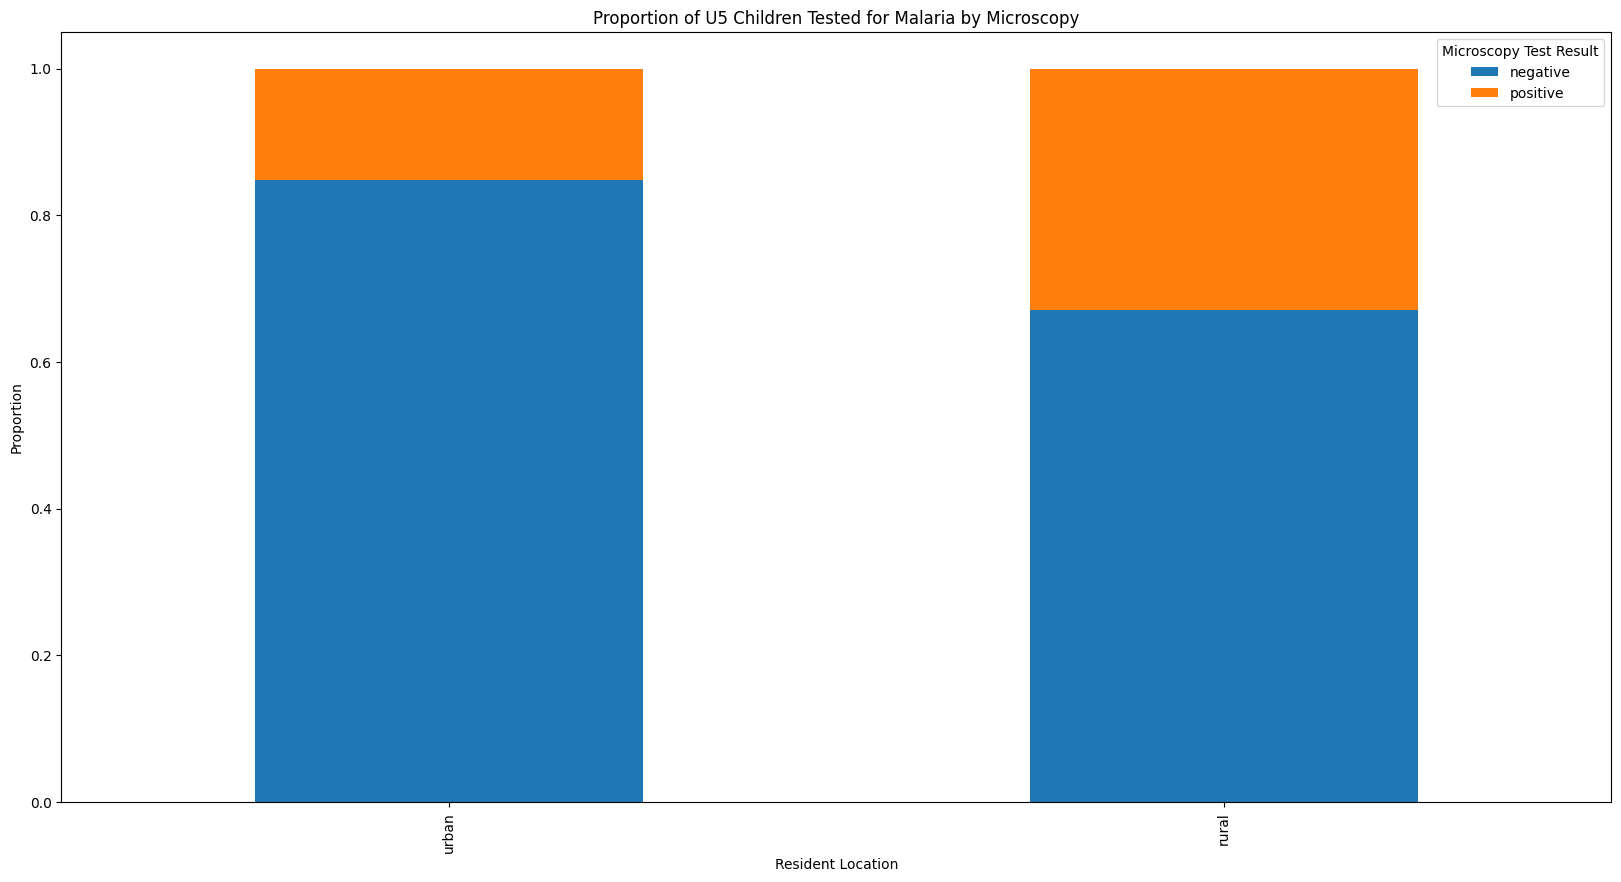

In [ ]:
# Plotting
proportion_data.plot(kind='bar', stacked=True, figsize=(20, 10))
plt.title('Proportion of U5 Children Tested for Malaria by Microscopy')
plt.xlabel('Resident Location')
plt.ylabel('Proportion')
plt.legend(title='Microscopy Test Result')

plt.show()

### Q.7 Map of the number of children that tested positive for malaria by state

In [ ]:
# Filter the data for relevant columns and conditions
merged_data["chl0"].fillna(0)
tested_positive_in_both_test = merged_data[(merged_data['hml32'] == "positive") & (merged_data['hml35'] == "positive")]

In [ ]:
tested_positive_in_both_test

,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,...,idxdis,hdis1,hdis2,hdis3,hdis4,hdis5,hdis6,hdis7,hdis8,hdis9
305,NGA,Nigeria,NGA.1_1,Abia,NaN,NaN,State,State,NaN,NG.AB,...,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
380,NGA,Nigeria,NGA.1_1,Abia,NaN,NaN,State,State,NaN,NG.AB,...,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
381,NGA,Nigeria,NGA.1_1,Abia,NaN,NaN,State,State,NaN,NG.AB,...,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
384,NGA,Nigeria,NGA.1_1,Abia,NaN,NaN,State,State,NaN,NG.AB,...,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1393,NGA,Nigeria,NGA.1_1,Abia,NaN,NaN,State,State,NaN,NG.AB,...,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182347,NGA,Nigeria,NGA.37_1,Zamfara,NaN,NaN,State,State,NaN,NG.ZA,...,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
182599,NGA,Nigeria,NGA.37_1,Zamfara,NaN,NaN,State,State,NaN,NG.ZA,...,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
182716,NGA,Nigeria,NGA.37_1,Zamfara,NaN,NaN,State,State,NaN,NG.ZA,...,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
182800,NGA,Nigeria,NGA.37_1,Zamfara,NaN,NaN,State,State,NaN,NG.ZA,...,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
grouped_data = tested_positive_in_both_test.groupby('NAME_1',)[['hv014', 'chl0']].sum()
grouped_data["hv014"].sum()

3939

In [ ]:
state_data = tested_positive_in_both_test[tested_positive_in_both_test['NAME_1'] == "Kano"]
# state_data
sum_test_positive = state_data[['hv014', 'chl0']].sum().sum()
sum_test_positive
# state_geometry = state_data['geometry'].iloc[0]


296.0

In [ ]:
# generating map df
# Create an empty DataFrame to store the results
result_list = []
# Loop through unique states
for state in unique_states:
    state_data = tested_positive_in_both_test[tested_positive_in_both_test['NAME_1'] == state]
    if not state_data.empty:
        sum_test_positive = state_data[['hv014', 'chl0']].sum().sum()
        state_geometry = state_data['geometry'].iloc[0]  # Assuming geometry is the same for all rows of the same state
        result_list.append({'state': state, 'test_positive': sum_test_positive, 'geometry': state_geometry})


In [ ]:
len(result_list)

36

In [ ]:
# Convert the list of dictionaries to a DataFrame
result_df = pd.DataFrame(result_list)
# Convert result_df to a GeoDataFrame
result_gdf = gpd.GeoDataFrame(result_df, geometry='geometry')

In [ ]:
result_gdf

,state,test_positive,geometry
0,Abia,39.0,"POLYGON ((7.48998 4.85506, 7.49438 4.84743, 7...."
1,Adamawa,74.0,"POLYGON ((12.01237 7.50763, 12.00726 7.50804, ..."
2,Akwa Ibom,64.0,"MULTIPOLYGON (((7.55570 4.50408, 7.55597 4.504..."
3,Anambra,56.0,"POLYGON ((7.25012 5.92631, 7.24832 5.92668, 7...."
4,Bauchi,167.0,"POLYGON ((11.01984 9.70526, 11.02580 9.69224, ..."
5,Bayelsa,45.0,"MULTIPOLYGON (((5.43681 4.94736, 5.43681 4.947..."
6,Benue,42.0,"POLYGON ((7.82773 6.63027, 7.82988 6.64209, 7...."
7,Borno,62.0,"POLYGON ((11.94555 10.04476, 11.94380 10.04515..."
8,Cross River,34.0,"POLYGON ((8.47764 4.69097, 8.47764 4.69153, 8...."
9,Delta,48.0,"MULTIPOLYGON (((5.39153 5.30514, 5.39153 5.304..."


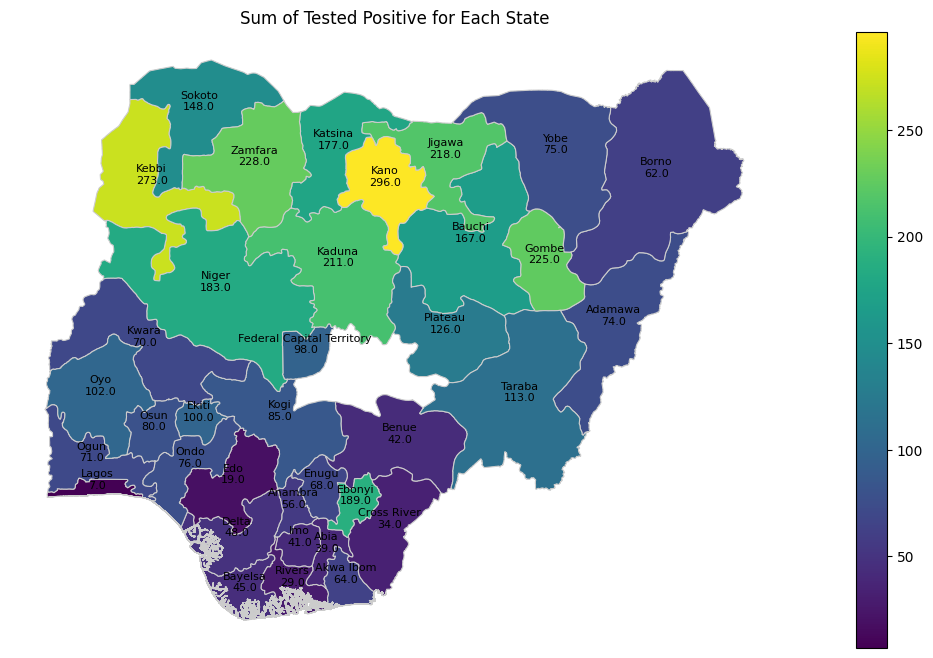

In [ ]:

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(20, 8))
result_gdf.plot(column='test_positive', cmap='viridis', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
# Annotate the state names on the map
for idx, row in result_gdf.iterrows():
    ax.annotate(text=f"{row['state']}\n{row['test_positive']}", xy=row['geometry'].centroid.coords[0], ha='center', fontsize=8)

ax.set_title('Sum of Tested Positive for Each State')
ax.set_axis_off()

plt.show()


#### Plot the GeoDataFrame with 'HML35' Result of malaria rapid test information

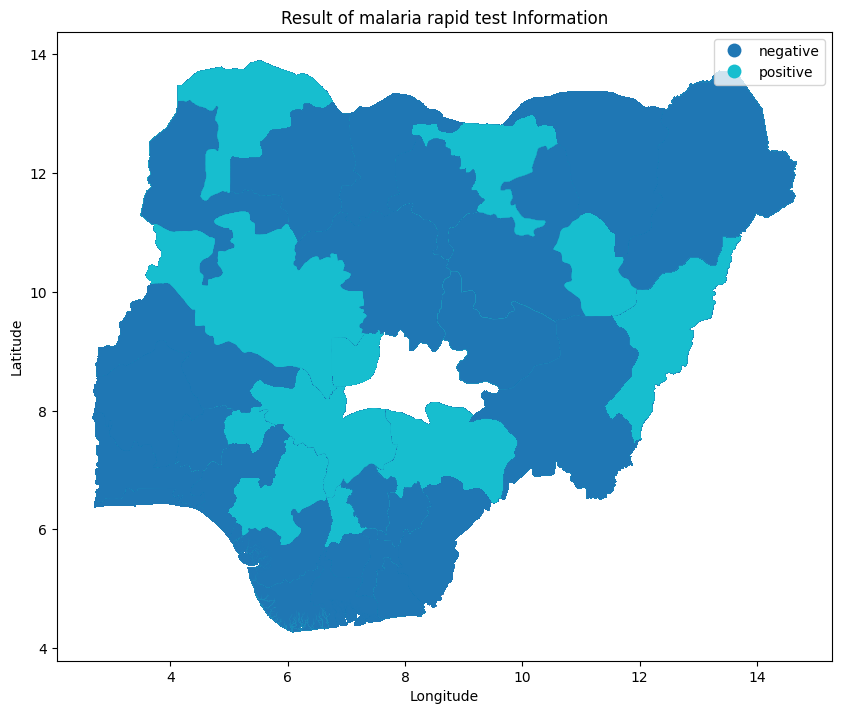

In [ ]:
ax = gdf_merged.plot(column='hml35', legend=True, figsize=(10, 10))
plt.title("Result of malaria rapid test Information")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()